In [182]:
import numpy as np 
import matplotlib.pyplot as plt

### Question 1

1. Upon solving the differentiated Intensity equation, we get x = hc/(lambda)(kb)T which can be written as lambda x T = b. here b = hc/kbx. which gives us Wein's displacement law : lambda = b/T. 

In [183]:
#2. 
def f(x): return 5*np.exp(-x) + x - 5 

def binary_search(f, x1, x2, switch = 1, tol = 1.0e-6):
    if f(x1)==0: return x1
    if f(x2)==0: return x2

    if f(x1)*f(x2) > 0: return 'Range not bracketed yet'
    n = int(np.ceil(np.log(abs(x2-x1)/tol/np.log(2.0))))
    for i in range(n):
        x3 = 0.5*(x1+x2)
        f3 = f(x3)
        if switch==1 and f(x3)>f(x2) and f(x3)>f(x1): return None
        if f(x3)*f(x2) < 0: x1 = x3
        else: x2 = x3 
    return np.round((x1+x2)/2, 7)

In [184]:
x = binary_search(f, 1, 6)
print(x)

4.9651108


Text(0, 0.5, 'f(x)')

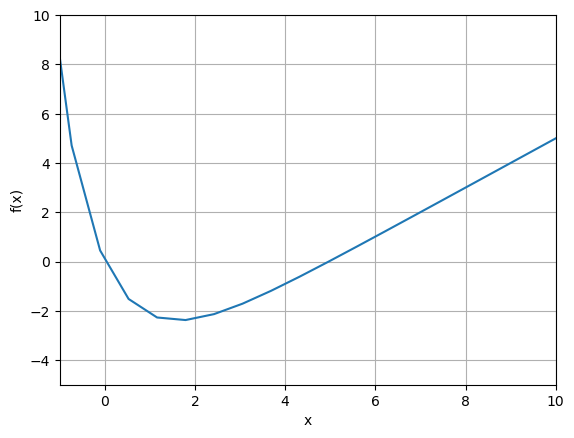

In [189]:
a = np.linspace(-2, 10, 20)
plt.plot(a, f(a))
plt.grid()
plt.xlim(-1, 10)
plt.ylim(-5, 10)
plt.xlabel("x")
plt.ylabel("f(x)")

In [190]:
h = 6.626e-34
c = 3e+8
kb = 1.38e-23

b = (h*c)/(kb*x)

print("Wien displacement constant:", b)

Wien displacement constant: 0.002901113068028


In [191]:
#3. 
l = 502e-9
T = b/l

print("surface temperature of the Sun:", T,"K")

surface temperature of the Sun: 5779.109697266932 K


### Question 2

In [192]:
def P(x): return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
def dP(x): return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

Text(0, 0.5, 'f(x)')

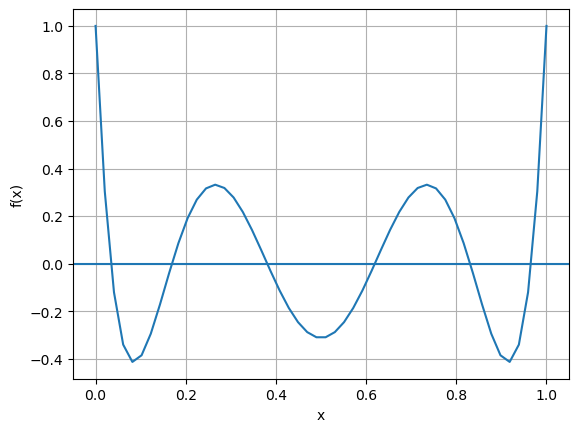

In [193]:
x = np.linspace(0, 1, 50)
plt.plot(x, P(x))
plt.axhline(0)
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

by inspection, roots are at :
0.03
0.18
0.38
0.61
0.82
0.95

In [196]:
def Newton_Raphson(f, df, x, tol=1.0e-10):
    dx = -f(x)/df(x)
    while abs(dx)>tol:
        x = x + dx
        dx = -f(x)/df(x)
    return x

print("roots:")
l = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
for i in l: 
    x = Newton_Raphson(P, dP, i)
    print(x)

roots:
0.033765242898423545
0.16939530676686765
0.3806904069583867
0.6193095930416064
0.8306046932330717
0.9662347571015681


### Question 3

In [197]:
def binary_search(f, x1, x2, switch = 1, tol = 1.0e-10):
    if f(x1)==0: return x1
    if f(x2)==0: return x2

    if f(x1)*f(x2) > 0: return 'Range not bracketed yet'
    n = int(np.ceil(np.log(abs(x2-x1)/tol/np.log(2.0))))
    for i in range(n):
        x3 = 0.5*(x1+x2)
        f3 = f(x3)
        if switch==1 and f(x3)>f(x2) and f(x3)>f(x1): return None
        if f(x3)*f(x2) < 0: x1 = x3
        else: x2 = x3 
    return (x1+x2)/2, n

def Newton_Raphson(f, df, x, tol=1.0e-10):
    dx = -f(x)/df(x)
    itr = 0
    while abs(dx)>tol:
        x = x + dx
        dx = -f(x)/df(x)
        itr+=1
    return x, itr

Text(0, 0.5, 'f(x)')

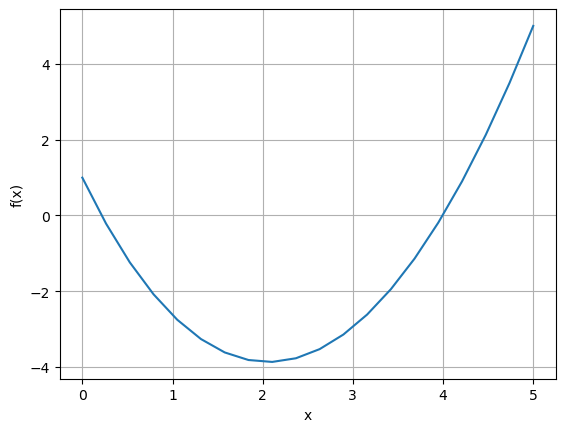

In [198]:
def f(x): return x**2 - 4*x + np.exp(-x)
def df(x): return 2*x - 4 - np.exp(-x)
    
x = np.linspace(0, 5, 20)
plt.plot(x, f(x))
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

In [199]:
# for the first root 
root_bi, n = binary_search(f, 0, 1)
root_nr, itr = Newton_Raphson(f, df, 1)

print("bisection method :")
print("root:", root_bi)
print("iterations:", n)

print("Newton-Raphson method :")
print("root:", root_nr)
print("iterations:", itr)

bisection method :
root: 0.21334806084632874
iterations: 24
Newton-Raphson method :
root: 0.2133480723354471
iterations: 5


In [200]:
# for the second root 
root_bi, n = binary_search(f, 3.5, 4.5)
root_nr, itr = Newton_Raphson(f, df, 4)

print("bisection method :")
print("root:", root_bi)
print("iterations:", n)

print("Newton-Raphson method :")
print("root:", root_nr)
print("iterations:", itr)

bisection method :
root: 3.995394676923752
iterations: 24
Newton-Raphson method :
root: 3.9953946518717376
iterations: 2


Newton Raphson is more efficient since it takes much fewer iteration

### Question 4

In [201]:
data = np.loadtxt(r"C:\Users\User\Desktop\Files\refractive_index.txt", skiprows=1)


Text(0, 0.5, 'refractive index')

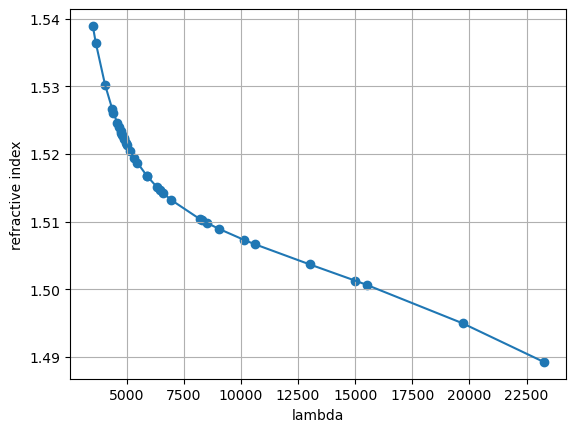

In [202]:
plt.plot(data.T[0], data.T[1])
plt.scatter(data.T[0], data.T[1])
plt.grid()
plt.xlabel("lambda")
plt.ylabel("refractive index")

In [203]:
def findclosest(x):
    """
    finding the values closest to given lambda in the given dataset
    """
    idx=0
    for i in data:
        if x<i[0]:
            return data[idx-1], i
        idx+=1

In [204]:
x1, x2 = findclosest(5.0e+3)

#linear interpolation 
def line(x):
    """
    interpolating linearly and finding value of refractive index at given lambda
    """
    p1, p2 = findclosest(x)
    m = (p2[1]-p1[1])/(p2[0]-p1[0])
    y = m*(x - p1[0]) + p1[1]
    return y 
print("refractive index at lambda 5000 A :", line(5.0e+3))

refractive index at lambda 5000 A : 1.521414423076923
